<a href="https://colab.research.google.com/github/RakeshthakurIITian/HackRush-22/blob/main/DL_Assignment_1_rakesh112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ES413: Deep Learning [ Assignment 1 ]

## Importing libraries for all the tasks

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sn
import numpy  as np

## Task 1: Decision Tree & Random Forest [7.5 marks]

#### MNIST dataset

The datasets module in keras provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

Here, we use `keras.datasets` to import `mnist.`

Explore other datasets provided by this keras module. 

Other libraries, such as, sklearn, pytorch, tensorflow (keras is now integrated as a submodule of tensorflow itself, tf.keras), also provide famous datasets for fast loading and testing.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np 


(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


The ground truth for the image at index 59361 is : 8
Total number of examples for digit 8 in training set are: 5851


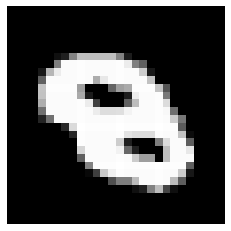

In [ ]:
# Following few lines are given here to give you headstart for analyzing the loaded mnist dataset
# Run them multiple times and make your observations

num= np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[num],cmap='gray')
plt.axis('off')
print('The ground truth for the image at index {} is : {}'.format(num,y_train[num]))
print('Total number of examples for digit {} in training set are: {}'.format(y_train[num], (y_train==y_train[num]).sum()))

#### Ques. 2(a) Dataset Analysis

Describe briefly about mnist dataset and the data stored in *x_train, y_train, x_test, y_test*. What does train set and test set signify? 

Make a bar plot showing the distribution of digits classes vs number of examples included in mnist dataset for both training set and testing set. 

In [ ]:
## Write code here.

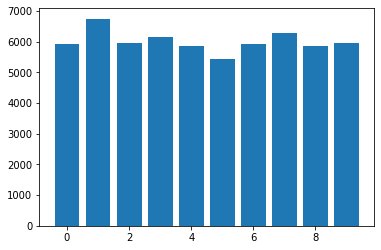

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [ ]:
c=[]
counter=0
k=np.unique(y_train)
for i in k:
  for j in y_train:
    if j==i:
      counter+=1
  c.append(counter)
  counter=0
plt.bar(k,c)
plt.show()
print(c)

**Write your analysis of dataset in this markdown**

`Lorem ipsum...`

From bar it was found that there are  5923 of  0 ,
6742 of 1, 5958 of 2, 6131 of 3, 5842 of 4, 5421 of 5, 5918 of 6, 6265 of 7, 5851 of 8 and  5949 of 9.
                      

#### Question 2(b) : **Decision tree** and **Random Forest**

Train both classifiers and Report the following for each class in testing and training set:


1.   True positive
2.   True Negative
3.   Accuracy
4.   Precision
5.   Recall
6.   F1 score

Finally, Report the following for overall train set and test set in mnist dataset:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1 *score*

Go through provided class snippet `gen_classifier` and modify as required.


In [ ]:
from sklearn import tree,ensemble
class gen_classifier(object):
  def __init__(self, x_train, x_test, y_train, y_test):
    self.x_train=x_train
    self.x_test=x_test
    self.x_train=self.x_train.reshape(self.x_train.shape[0],(self.x_train.shape[1]*self.x_train.shape[1])) 
    self.x_test=self.x_test.reshape(self.x_test.shape[0],(self.x_test.shape[1]*self.x_test.shape[1])) 
    self.y_train=y_train
    self.y_test=y_test
    self.seed = 1000 # For reproducibility
    self.unique_classes= np.unique(y_test)

  def fit_decision_tree_classifier(self):
    #####
    # Add code here to train/fit decision tree on mnist
    
    clf_dt=tree.DecisionTreeClassifier(criterion='gini')
    clf_dt=clf_dt.fit(self.x_train,self.y_train)
    return clf_dt
  
  def fit_random_forest_classifier(self):
    #####
    # Add code here to train/fit random forest on mnist
    clf_rf=ensemble.RandomForestClassifier(criterion='gini',max_features='auto')
    clf_ref=clf_rf.fit(self.x_train,self.y_train)
    return clf_rf

  def clf_predict(self,trained_clf=None):
    ### Use your trained classifier to make predictions
    ### Replace following hard coded lines with your code
    model=trained_clf
    y_pred_train = model.predict(self.x_train)
    y_pred_test = model.predict(self.x_test)
    ####
    return y_pred_train, y_pred_test, self.y_train, self.y_test

  def per_class_metrics(self, y_true, y_pred, classifier_name=None, split=None):
    
    TP=[]
    TN=[]
    Accuracy=[]
    Precision=[]
    Recall=[]
    F1score=[]
    Label=[]
    c_tp,c_fp,c_tn,c_fn,c=0,0,0,0,0
    conf_matrix=confusion_matrix(y_true,y_pred,labels=['0','1','2','3','4','5','6','7','8','9'])
    for label in self.unique_classes:
      # Write code here that calculates the following for current label and assigns the values in variable named = (tp,tn,acc,prec,recall, f1)
      ###################
      # Your code here
      # For example, hard coded to 0:

      for i in range(0,len(y_pred)):
          if y_true[i]==label:
             c+=1
             if y_pred[i]==label:
                c_tp+=1
             else:
                c_fn+=1
          if y_pred[i]==label:
             if y_true[i]==label:
                c_fp+=1
             else:
                c_tn+=1



      tp = c_tp
      tn = c_tn
      fp = c_fp
      fn = c_fn
      acc = tp/c
      prec = tp/(tp+fp)
      rec = tp/(tp+fn)
      f1= (2*prec*rec)/(prec+rec)
      c_tp,c_fp,c_tn,c_fn,c=0,0,0,0,0

      ##########################

      TP.append(tp)
      TN.append(tn)
      Accuracy.append(acc)
      Precision.append(prec)
      Recall.append(rec)
      F1score.append(f1)
      Label.append(label)
    
    clf_name=classifier_name
    text=''
    print(Label)
    for idx in range(len(Label)):
      text += 'For class : {}, Following are the metrics with {} on {} set\nTrue Positive : {}\nTrue Negative : {}\nAccuracy : {}\nPrecision : {}\nRecall : {}\nF1score : {}\n\n'.format(Label[idx],clf_name, split,TP[idx],TN[idx],Accuracy[idx],Precision[idx],Recall[idx],F1score[idx])
    print(text)


  def overall_metrics(self, y_true, y_pred,classifier_name=None, split=None):
    # Write code here that calculates the following and assigns the values in variable named = (tp,tn,acc,prec,recall, f1)
    ###################
    # Your code here
    # For example, hard coded to 0:
    TP=[]
    TN=[]
    Accuracy=[]
    Precision=[]
    Recall=[]
    F1score=[]
    c_tp,c_fp,c_tn,c_fn,c=0,0,0,0,0
    for label in self.unique_classes:
      for i in range(0,len(y_pred)):
          if y_true[i]==label:
             c+=1
             if y_pred[i]==label:
                c_tp+=1
             else:
                c_fn+=1
          if y_pred[i]==label:
             if y_true[i]==label:
                c_fp+=1
             else:
                c_tn+=1
    
      tp = c_tp
      tn = c_tn
      fp = c_fp
      fn = c_fn
      acc = tp/c
      prec = tp/(tp+fp)
      rec = tp/(tp+fn)
      f1= (2*prec*rec)/(prec+rec)
      c_tp,c_fp,c_tn,c_fn,c=0,0,0,0,0
      TP.append(tp)
      TN.append(tn)
      Accuracy.append(acc)
      Precision.append(prec)
      Recall.append(rec)
      F1score.append(f1)
    TP,TN,Accuracy,Precision,Recall,F1score=np.array(TP),np.array(TN),np.array(Accuracy),np.array(Precision),np.array(Recall),np.array(F1score)
    tp = np.sum(TP)/len(TP)
    tn= np.sum(TN)/len(TN)
    acc = np.sum(Accuracy)/len(Accuracy)
    prec = np.sum(Precision)/len(Precision)
    rec = np.sum(Recall)/len(Recall)
    f1= np.sum(F1score)/len(F1score)
    ##########################
    clf_name=classifier_name
    text = 'Following are the metrics for {} on {} set:\nTrue Positive : {}\nTrue Negative : {}\nAccuracy : {}\nPrecision : {}\nRecall : {}\nF1score : {}\n\n'.format(clf_name,split,tp,tn, acc,prec,rec,f1)
    print(text)

Use the created class now to report results on loaded mnist dataset.

Instantiation of class by `gen_classifier(x_train,x_test,y_train,y_test)`, provided `x_train,x_test,y_train,y_test`, same class can be used to evaluate the learning ability of theses algorithms on other datasets also. Apart from assigned work on MNIST, try experimenting with other datasets for better understanding.


A demo of usage is provided below.

In [ ]:
# Instantiate class
clf = gen_classifier(x_train,x_test,y_train,y_test)

# Use the created methods
dtree=clf.fit_decision_tree_classifier()   ## Edit this method to train Decision tree
rf = clf.fit_random_forest_classifier()    ## Edit this method to train Random forest

# Make predictions by passing desired classifier to clf_predict method. First Edit the method to make predictions.
y_pred_train_dt, y_pred_test_dt, y_true_train_dt, y_true_test_dt= clf.clf_predict(trained_clf=dtree)
y_pred_train_rf, y_pred_test_rf, y_true_train_rf, y_true_test_rf= clf.clf_predict(trained_clf=rf)


In [ ]:
# Use following methods to calculate per class metrics. First Edit per_class_metrics and overall_metrics methods of gen_classifier class.
clf.per_class_metrics(y_true_test_dt,y_pred_test_dt,classifier_name='Decision Tree', split= None)

# Use following methods to calculate overall metric
clf.overall_metrics(y_true_train_rf,y_pred_train_rf,classifier_name='Random forest', split= 'train')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
For class : 0, Following are the metrics with Decision Tree on None set
True Positive : 921
True Negative : 82
Accuracy : 0.939795918367347
Precision : 0.5
Recall : 0.939795918367347
F1score : 0.6527285613040397

For class : 1, Following are the metrics with Decision Tree on None set
True Positive : 1093
True Negative : 55
Accuracy : 0.9629955947136564
Precision : 0.5
Recall : 0.9629955947136564
F1score : 0.6582354712436013

For class : 2, Following are the metrics with Decision Tree on None set
True Positive : 879
True Negative : 132
Accuracy : 0.8517441860465116
Precision : 0.5
Recall : 0.8517441860465116
F1score : 0.6301075268817204

For class : 3, Following are the metrics with Decision Tree on None set
True Positive : 869
True Negative : 172
Accuracy : 0.8603960396039604
Precision : 0.5
Recall : 0.8603960396039604
F1score : 0.6324599708879185

For class : 4, Following are the metrics with Decision Tree on None set
True Positive : 865
True Negative : 

#### Ques. 2(c) : **Confusion matrix**

Plot confusion matrix for both the classifiers and provide an explanation on the difference between the two matrices.

In [ ]:
# Create a plot for confusion matrix for decision tree and random forest.
# Write your code here

def confusion_matrix(y_true,y_pred):
  u=np.unique(y_true)
  l=len(u)
  mat=np.zeros([l,l])
  c=0
  label=np.unique(y_true)
  for i in label:
    for j in label:
      for k in range(0,len(y_pred)):
        if (y_true[k]==i and y_pred[k]==j):
          c+=1
      mat[i,j]=int(c)
      c=0

  return mat

#plt.matshow(confusion_matrix(y_true_test_dt,y_pred_test_dt))
#plt.colorbar()
#plt.show()
np.set_printoptions(suppress=True)
print("Decision Tree classifier CM")
print(confusion_matrix(y_true_test_dt,y_pred_test_dt))
print("Random Forest classifier CM")
print(confusion_matrix(y_true_test_rf,y_pred_test_rf))

Decision Tree classifier CM
[[ 921.    1.    6.    3.    4.   13.   11.    4.    8.    9.]
 [   0. 1093.   11.    7.    3.    4.    6.    2.    7.    2.]
 [   9.   10.  879.   40.   10.   12.   13.   24.   24.   11.]
 [   7.    5.   24.  869.    4.   42.    4.    9.   23.   23.]
 [   6.    4.    7.    3.  865.   11.   12.   11.   13.   50.]
 [  15.    7.    5.   45.    4.  757.   18.    3.   22.   16.]
 [  17.    4.   12.    5.   19.   20.  849.    3.   24.    5.]
 [   2.    9.   27.   12.    7.    5.    2.  933.    7.   24.]
 [  13.    9.   32.   38.   22.   28.   18.    9.  779.   26.]
 [  13.    6.    8.   19.   39.   10.    5.   17.   28.  864.]]
Random Forest classifier CM
[[ 969.    0.    1.    1.    0.    2.    2.    1.    4.    0.]
 [   0. 1122.    3.    3.    1.    2.    3.    0.    1.    0.]
 [   7.    0.  999.    6.    2.    0.    4.    8.    6.    0.]
 [   0.    0.    6.  976.    0.    8.    0.    9.    8.    3.]
 [   1.    0.    3.    0.  957.    0.    4.    0.    2.   15.

**Write comparative analysis between the obtained confusion matrices in this mark down**

`Lorem ipsum....`



On comparing confusion matrix of both the classifiers we can conclude that Random forest has a higher classification performance than Decision tree since the value of diagonal elements in the confusion matrix of Random forest is greater than in Decision tree which portarys that the number of true positives and true negatives are  greater in Random forest than in Decision tree. 

## Task 2: ScratchWorld [7.5 marks]

<font size="3"> Welcome to **ScratchWorld** where in order to survive you have to write codes from scratch. Luxuries like pytorch, tensorflow, some part of sklearn does not exsist in this world. Your task is to help our friend Saitama to reach top rank in S class of hero association by solving certain problem that association has sent him for intelligence test. Hero association have one strict rule "**write some part of the code from scratch**". Help Saitama by solving following task, where he has to **implement K-Nearest Neighbour algorithm from scratc**h. <br/>
Story to be continued, going to be more fun in future....
</font>
* One punch man [[Link](https://onepunchman.fandom.com/wiki/One-Punch_Man_Wiki)]

### KNN (K-Nearest Neighbor) [Link: [1](https://www.wikiwand.com/en/K-nearest_neighbors_algorithm), [2](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning), [3](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)]

##### Loading dataset

In [ ]:
mnist = None

In [ ]:
# Prevent data from reloading, takes 3-4 minutes for downloading the dataset
if mnist is None:
    _      = 1000
    mnist  = fetch_openml('mnist_784')
    digits = mnist.data # Digitis: (70000, 784)
    labels = mnist.target # Labels: (70000,)
    digits = digits[:_].to_numpy() # For assignment purpose we are considering only first 1000 data
    labels = labels[:_].to_numpy() # For assignment purpose we are considering only first 1000 data

##### Code

In [ ]:
# Train (80%) - Test (20%) Split
# You can use sklearn train_test_split method, set random_state=45,
# must set stratify to labels for balance data split

# Write your code below this
X_train, X_test, Y_train, Y_test = train_test_split(digits, labels, test_size=0.2, random_state=45, stratify=labels)

In [ ]:
# Function that implement k-NN algorithm
from sklearn.neighbors import KNeighborsClassifier
def algo_knn(x_test, x_train, y_train, k=3):
    # Write the code below this
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    return knn.predict(x_test)

In [ ]:
# main method
Y_hat = algo_knn(X_test, X_train, Y_train, k=3)

In [ ]:
# Metrics calculation 
# Calculate Accuracy and each class Precision-Recall

def custom_precision(y, y_hat, cls):
     c,c_tp,c_tn,c_fp,c_fn=0,0,0,0,0
     for i in range(0,len(y_hat)):
          if y[i]==cls:
             c+=1
             if y_hat[i]==cls:
                c_tp+=1
             else:
                c_fn+=1

          if y_hat[i]==cls:
             if y[i]==cls:
                c_fp+=1
             else:
                c_tn+=1
     tp = c_tp
     tn = c_tn
     fp = c_fp
     fn = c_fn
     prec = tp/(tp+fp)
     return prec
    


def custom_recall(y, y_hat, cls):
    c,c_tp,c_tn,c_fp,c_fn=0,0,0,0,0
    for i in range(0,len(y_hat)):
          if y[i]==cls:
             c+=1
             if y_hat[i]==cls:
                c_tp+=1
             else:
                c_fn+=1
          if y[i]==cls:
             if y_hat[i]==cls:
                c_fp+=1
             else:
                c_tn+=1
    tp = c_tp
    tn = c_tn
    fp = c_fp
    fn = c_fn
    rec = tp/(tp+fn)
    return rec     

def custom_acc(y, y_hat):
    c=0
    for i in range(0,len(y_hat)):
          if y[i]==y_hat[i]:
             c+=1

    acc = c/len(y_hat)
    return acc

print('Accuracy: ', custom_acc(Y_test, Y_hat))

for cls in np.unique(Y_test):
    print('Class: ', cls)
    print('Precision: ', custom_precision(Y_test, Y_hat, cls))
    print('Recall: ', custom_recall(Y_test, Y_hat, cls))
    print()

Accuracy:  0.885
Class:  0
Precision:  0.5
Recall:  0.9473684210526315

Class:  1
Precision:  0.5
Recall:  1.0

Class:  2
Precision:  0.5
Recall:  0.75

Class:  3
Precision:  0.5
Recall:  0.9473684210526315

Class:  4
Precision:  0.5
Recall:  0.9523809523809523

Class:  5
Precision:  0.5
Recall:  0.7368421052631579

Class:  6
Precision:  0.5
Recall:  1.0

Class:  7
Precision:  0.5
Recall:  0.8695652173913043

Class:  8
Precision:  0.5
Recall:  0.7058823529411765

Class:  9
Precision:  0.5
Recall:  0.9



In [ ]:
# Create a plot for confusion matrix with label
# For confusion matrix you can use sklearn confusion matrix function
# Write your code below this
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_hat)
#plt.matshow(confusion_matrix(Y_test, Y_hat))
#plt.colorbar()
#plt.show()

array([[18,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 15,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 14,  0,  0,  3,  1],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  1,  2,  0,  1,  1,  0, 12,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0, 18]])

In [ ]:
print

['3' '9' '2' '8' '7' '6' '9' '8' '3' '8' '9' '5' '0' '4' '7' '8' '9' '2'
 '9' '5' '4' '8' '5' '0' '2' '0' '2' '8' '0' '7' '8' '0' '7' '1' '8' '1'
 '0' '4' '0' '1' '2' '5' '4' '2' '3' '7' '2' '7' '0' '1' '2' '3' '9' '5'
 '3' '5' '2' '9' '3' '3' '1' '4' '9' '9' '1' '4' '8' '1' '6' '1' '0' '6'
 '1' '9' '0' '7' '3' '7' '1' '1' '9' '4' '3' '1' '5' '2' '8' '4' '4' '3'
 '7' '6' '0' '7' '5' '5' '7' '6' '0' '6' '6' '5' '4' '2' '1' '0' '7' '0'
 '8' '7' '9' '7' '3' '3' '8' '7' '2' '0' '4' '6' '1' '6' '0' '7' '1' '7'
 '6' '2' '9' '9' '2' '7' '3' '8' '7' '8' '6' '9' '1' '9' '5' '5' '3' '8'
 '9' '0' '7' '8' '1' '4' '3' '0' '6' '3' '1' '6' '4' '0' '9' '3' '1' '4'
 '5' '5' '4' '7' '6' '3' '1' '2' '5' '4' '4' '6' '6' '7' '4' '2' '2' '4'
 '8' '9' '6' '1' '6' '1' '2' '5' '5' '5' '5' '9' '2' '6' '3' '4' '7' '4'
 '1' '2']


In [ ]:
print(Y_hat)

['3' '9' '2' '8' '7' '6' '4' '8' '3' '8' '9' '9' '0' '4' '7' '8' '9' '2'
 '9' '5' '4' '8' '8' '0' '2' '0' '0' '6' '0' '7' '5' '0' '7' '1' '3' '1'
 '0' '4' '0' '1' '2' '5' '4' '1' '3' '2' '1' '7' '0' '1' '7' '3' '9' '5'
 '3' '5' '2' '9' '9' '3' '1' '4' '9' '9' '1' '4' '8' '1' '6' '1' '0' '6'
 '1' '4' '0' '1' '3' '7' '1' '1' '9' '4' '3' '1' '5' '2' '8' '9' '4' '3'
 '7' '6' '0' '7' '5' '8' '7' '6' '0' '6' '6' '5' '4' '2' '1' '0' '7' '0'
 '8' '7' '9' '7' '3' '3' '8' '7' '1' '0' '4' '6' '1' '6' '5' '7' '1' '7'
 '6' '2' '9' '9' '2' '7' '3' '2' '1' '8' '6' '9' '1' '9' '8' '5' '3' '8'
 '9' '0' '7' '3' '1' '4' '3' '0' '6' '3' '1' '6' '4' '0' '9' '3' '1' '4'
 '5' '5' '4' '7' '6' '3' '1' '2' '0' '4' '4' '6' '6' '7' '4' '2' '2' '4'
 '8' '9' '6' '1' '6' '1' '2' '5' '5' '5' '5' '9' '2' '6' '3' '4' '7' '4'
 '1' '2']
